<h2>Using SAS DLPy to Create Training Data Sets for Object Detection Models</h2>


This example uses SAS DLPy to create and manipulate training image data sets for use with CNN-based object detection models. The learning objective is to understand how you can use SAS DLPy to create your own object detection training data set with only a few lines of code. You should also learn how to visually inspect an object detection data set for potential issues.

The example begins with [configuring the computing environment](#configureIt) which is followed by [creating an object detection CAS table](#createObject). 





<h3>Configure Your Computing Environment for the Model Task <a name="ConfigureIt"></a></h3>


SAS DLPy requires a running SAS CAS server and Scripting Wrapper for Analytic Transfer (SWAT). The SWAT package is a Python interface to CAS. 

<b>Note:</b> For more information about starting a CAS session with the SWAT package, see https://sassoftware.github.io/python-swat/getting-started.html.

Next, import the functions for the DLPy and DLPy `utils`.

In [6]:
from swat import *
import dlpy
from dlpy.utils import *

<h3>Connect to CAS Server<a name="launchCAS"></a></h3>


After configuring your environment and loading required libraries and functions, connect to your CAS server. You will need the host name and port number.

In [12]:
s = CAS( cashost, casport)

<h3>Create and Load CAS Image Table for Object Detection Model<a name="createObject"></a></h3>

Use the `create_object_detection_table()` function to create a CAS image table for a CNN-based object detection task. Data tables for object detection models are more difficult to create than data tables for image classification models because the ground truth information in the object detection task is more complicated. Image classification data tables require only one label column, but object detection models can require multiple bounding boxes and two or more label columns. 

When creating labeled image data to train an object detection model, the raw data must meet the following requirements:

1. The annotation data used to define bounding boxes and labels needs to be in PASCAL VOC format.
2. For each image, there should be an annotation file with the same name and different extension. This file should contain the ground truth information for a specific image. 
 

The `create_object_detection_table()` function performs the following tasks:
1. Parse the contents of the ground truth information file.
2. Format the ground truth information into a Python data frame.
3. Create a metadata table to store the ground truth information. 
4. Load and process the model image data. Processing the data includes extracting 
   audio features, loading the audio metadata, and joining the audio and metadata 
   features into a single table.  

You can use the combined object detection image table as data for DLPy model functions and CAS Deep Learning actions. 


There are server and client operations performed in order to achieve this task. Therefore, there are two paths: data_path and local_path. If the CAS Server OS and the OS that the DLPy is running are the same, then using `data_path` should be the location where images and annotations are stored. Otherwise, `data_path` indicates the location of the images, and `local_path` indicates the location of the annotation files. 

`coord_type` determines the format for the bounding boxes. DLPy supports three formats: *yolo* and *coco*

In [10]:
object_detection_targets = create_object_detection_table(s, 
                                                         data_path = '//DeepLearn/ethem-kinginthenorth/obj_test_data', 
                                                         local_path = r'\\DeepLearn\ethem-kinginthenorth\obj_test_data',
                                                         coord_type = 'yolo', 
                                                         output = 'detTbl')

NOTE: Loaded 90 images from /DeepLearn/ethem-kinginthenorth/obj_test_data into Cloud Analytic Services table DET_IMG_b3JQpD.
NOTE: Images are processed.
NOTE: Object detection table is successfully created.


The log indicates that 90 images were loaded from the folder specified in `img_path`.

<h3>Visualize Object Detections in Image Table Data <a name="visualizeObject"></a></h3>




The function `display_object_detections()` displays the bounding boxes around detected objects in table images. Use the `display_object_detections()` function when you want to browse object detections in an image table, or to evaluate object detection accuracy when a trained model scores new images.

The following code uses the `display_object_detections()` function to browse the images in table `detTbl`. You can examine table images to see detected objects and bounding box labels. The function call in the following code returns a table that displays 6 images from the new object detection table `detTbl`, using a 2 x 3 matrix. Each image is limited to a maximum of 3 detected objects.

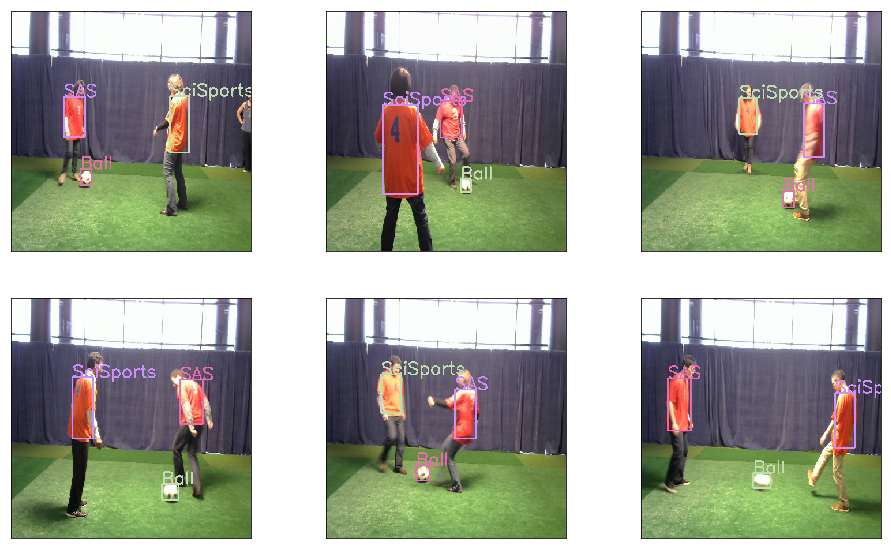

In [11]:
display_object_detections(s, 'detTbl', 'yolo', max_objects=3, num_plot=6, n_col=3)